In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [1]:
# python has a couple of built-in sorting functions
# sorted() and sort()
L = [3, 1, 4, 1, 5, 9, 2, 6]
sorted(L)  # returns a sorted copy of L

[1, 1, 2, 3, 4, 5, 6, 9]

In [2]:
# by contrast, sort sorts L in place and returns None
L.sort()
print(L)

[1, 1, 2, 3, 4, 5, 6, 9]


In [4]:
# python's sorting methods are quite flexible and can handle any iterable object for example strings
sorted("python")
# these are less performant than the built-in string methods this is where numpy's sorting functions come in handy

['h', 'n', 'o', 'p', 't', 'y']

Fast sorting in numpy np.sort() and np.argsort()

In [6]:
# the np.sort function is analogus to python's sorted function
x = np.array([2, 1, 4, 3, 5])
np.sort(x)

array([1, 2, 3, 4, 5])

In [7]:
# similarly to the sort method of python's lists, you can also sort an array in-place using the sort method
x.sort()
print(x)

[1 2 3 4 5]


In [10]:
# a related function is argsort, which instead returns the indices of the sorted elements
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
print(i)

[1 0 3 2 4]


In [11]:
# the first element of this result gives the index of the smallest element, the second value gives the index of the second smallest, and so on. these indices can then be used to construct the sorted array if desired
x[i]

array([1, 2, 3, 4, 5])

Sorting along rows or columns

In [14]:
rng = np.random.default_rng(seed=42)
X = rng.integers(0, 10, (4, 6))
print(X)

[[0 7 6 4 4 8]
 [0 6 2 0 5 9]
 [7 7 7 7 5 1]
 [8 4 5 3 1 9]]


In [15]:
# sort each column of X
np.sort(X, axis=0)

array([[0, 4, 2, 0, 1, 1],
       [0, 6, 5, 3, 4, 8],
       [7, 7, 6, 4, 5, 9],
       [8, 7, 7, 7, 5, 9]])

In [16]:
# sort each row of X'
np.sort(X, axis=1)
# it treats each row or column as an independent array, and any relationships between the row or column values will be lost!

array([[0, 4, 4, 6, 7, 8],
       [0, 0, 2, 5, 6, 9],
       [1, 5, 7, 7, 7, 7],
       [1, 3, 4, 5, 8, 9]])

In [17]:
# Partial Sorts: Partitioning
# sometimes we want to find the k smallest values in the array this can be done with the np.partition function
# np.partition takes an array and a number K; the result is a new array with the smallest K values to the left of the partition
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

In [18]:
# the first three values in the resulting array are the three smallest in the array, and the remaining array positions contain the remaining values. within the two partitions, the elements have arbitrary order
# simlar to sorting, we can partition along an arbitrary axis of a multidimensional array
np.partition(X, 2, axis=1)
# the result is an array where the first two slots in each row contain the smallest values from that row, with the remaining values filling the remaining slots

array([[0, 4, 4, 7, 6, 8],
       [0, 0, 2, 6, 5, 9],
       [1, 5, 7, 7, 7, 7],
       [1, 3, 4, 5, 8, 9]])

k-nearest neighbors

In [19]:
X = rng.random((10, 2))

/var/folders/8q/0wn9p2n54hb1x_gb6ckxsdxr0000gn/T/ipykernel_69480/672853886.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


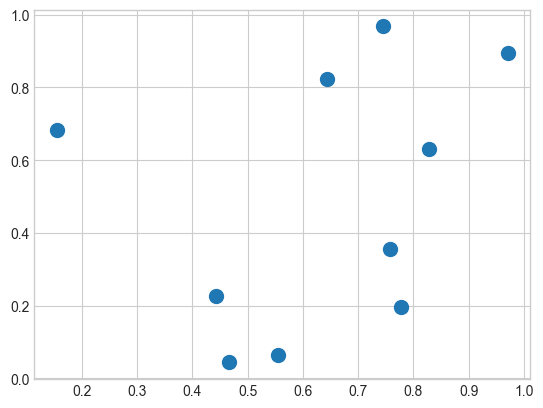

In [22]:
# we can generate a scatter plot
plt.style.use("seaborn-whitegrid")
plt.scatter(X[:, 0], X[:, 1], s=100)

In [23]:
# we'll compute the distance between each pair of points. the squared distance between two points is the sum of the squared differences in each dimension; using the efficient broadcasting and aggregation routines provided by numpy we can compute the matrix of square distances in a single line of code
dist_sq = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis=-1)

In [24]:
# it can be useful to break down such an expression into its component steps
# for each pair of points, compute differences in their coordinates
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences.shape

(10, 10, 2)

In [25]:
# square the coordinate differences
sq_differences = differences**2
sq_differences.shape

(10, 10, 2)

In [26]:
# sum the coordinate differences to get the squared distance
dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

In [27]:
# as a quick ckeck of the logic we should see that the diagonal of this matrix (i.e., the set of distances between each point and itself) should be all zero
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [28]:
# with the pairwise square-distances converted, we can now use np.argsort to sort along each row. the leftmost columns will then give the indices of the nearest neighbors
nearest = np.argsort(dist_sq, axis=1)
print(nearest)
# the first column gives the numbers 0-9 in order: this is due to the fact that each point's closest neighbor is itself, as we would expect
# By using sort here we've actually done more work than we need. If we're simply interested in the nearest k neighbors, all we need is partion each row so that the smallest k + 1 squared distances come first, with larger distances filling the remaining positions of the array. We can do this with the np.argpartition function

[[0 9 3 5 4 8 1 6 2 7]
 [1 7 2 6 4 8 3 0 9 5]
 [2 7 1 6 4 3 8 0 9 5]
 [3 0 4 5 9 6 1 2 8 7]
 [4 6 3 1 2 7 0 5 9 8]
 [5 9 3 0 4 6 8 1 2 7]
 [6 4 2 1 7 3 0 5 9 8]
 [7 2 1 6 4 3 8 0 9 5]
 [8 0 1 9 3 4 7 2 6 5]
 [9 0 5 3 4 8 6 1 2 7]]


In [29]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

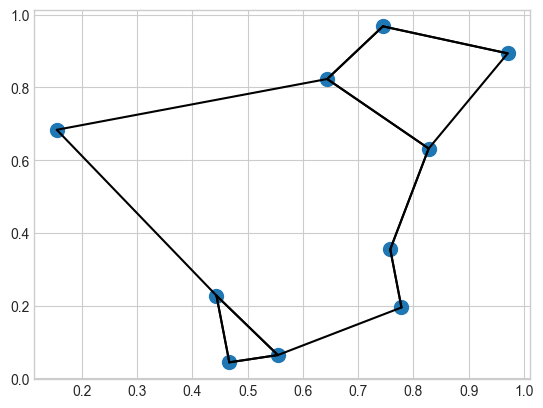

In [30]:
# to visualize this network of neighbors, plot points along with lines representing connections from each point to its two nearest neighbors
plt.scatter(X[:, 0], X[:, 1], s=100)

# draw lines from each point to its two nearest neighbors
K = 2

for i in range(X.shape[0]):
    for j in nearest_partition[i, : K + 1]:
        # plot a line from X[i] to X[j]
        # use some zip magic to make it happen:
        plt.plot(*zip(X[j], X[i]), color="black")

In [31]:
# each point in the plot has lines drawn to its two nearest neighbors. At first glance it might seem strange that some of the points have more than two lines coming out of them: this is due to the fact that if point A is one of the two nearest neighbors of point B, this does not necessarily imply that point B is one of the two nearest neighbors of point A
# although the broadcasting and row-wise sorting of this approach might seem less straightforward than writing a loop, it turns out to be a very efficient way of operating on this data in Python. You might be tempted to do the same type of operation by manually looping through the data and sorting each set of neighbors individually, but this would almost certainly lead to a slower algorithm than the vectorized version we used. The beauty of this approach is that it's written in a way that's agnostic to the size of the input data: we could just as easily compute the neighbors among 100 or 1,000,000 points in any number of dimensions, and the code would look the same.

In [32]:
# Numpy's structured arrays
# often data can be well represented in a homogenous array of values sometimes this is not the case there are structured arrays and record arrays which provide efficient storage for compound, heterogeneous data while the patterns shown here are simple operations.
name = ["Alice", "Bob", "Cathy", "Doug"]
age = [25, 45, 37, 19]
weight = [55.0, 85.5, 68.0, 61.5]
# but this is a bit clumsy there's nothing here that tells us that the three arrays are related; Numpys structured arrays allow us to do this more naturally by using a single structure to store all of this data

In [34]:
# recall that previously we created a simple array using an expression like this
x = np.zeros(4, dtype=int)
# we can simalrly create a structured array using a compound data type specification
data = np.zeros(
    4, dtype={"names": ("name", "age", "weight"), "formats": ("U10", "i4", "f8")}
)
print(data.dtype)
# u10 translates to unicode string of maximum length 10, i4 translates to 4-byte integer, and f8 translates to 8-byte float.

[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')]


In [35]:
# now that we have created an empty container array, we can fill the array with our lists of values
data["name"] = name
data["age"] = age
data["weight"] = weight
print(data)

[('Alice', 25, 55. ) ('Bob', 45, 85.5) ('Cathy', 37, 68. )
 ('Doug', 19, 61.5)]


In [36]:
# we can refer to values in the array by index or by name
# get all names
data["name"]

array(['Alice', 'Bob', 'Cathy', 'Doug'], dtype='<U10')

In [37]:
# get first row of data
data[0]

('Alice', 25, 55.)

In [38]:
# get the name from the last row
data[-1]["name"]

'Doug'

In [39]:
# usinng boolean masking we can even do more sophisticated operations, such as filtering on age
# get names where age is under 30
data[data["age"] < 30]["name"]

array(['Alice', 'Doug'], dtype='<U10')

In [40]:
# structured data arrays can be specified in a number of ways using a dictionary
np.dtype({"names": ("name", "age", "weight"), "formats": ("U10", "i4", "f8")})
# for clarity, numerical types can be specified using Python types or NumPy dtypes instead
np.dtype(
    {"names": ("name", "age", "weight"), "formats": ((np.str_, 10), int, np.float32)}
)
# a compound type can also be specified as a list of tuples
np.dtype([("name", "S10"), ("age", "i4"), ("weight", "f8")])
# if the names of the types do not matter to you, you can specify the types alone in a comma-seperated string
np.dtype("S10,i4,f8")
# the shortened string format may not be immediately intuitive but they are built on the following simple principle
# the first character < or > means little endian or big endian respectively that specifies the ordering convention for significant bits, the next character specifies the type of data: characters, bytes, ints, floating points, and so on, the last character or characters represents the size of the object in bytes

dtype([('f0', 'S10'), ('f1', '<i4'), ('f2', '<f8')])

In [43]:
# it is possible to define even more advanced compound types. for example, you can create a type where each element contains an arrray or matrix of values. here, we'll create a data type with a mat component consisting of a 3x3 floating-point matrix
tp = np.dtype([("id", "i8"), ("mat", "f8", (3, 3))])
X = np.zeros(1, dtype=tp)
print(X[0])
print(X["mat"][0])
# now each element in the X array consists of an id and a 3x3 matrix. why would you use this rather than a simple multidimensional array, or perhaps a Python dictionary? the reason is that this NumPy dtype directly maps onto a C structure definition, so the buffer containing the array content can be accessed directly within an appropriately written C program. if you find yourself writing a Python interface to a legacy C or Fortran library that manipulates structured data, you'll probably find structured arrays quite useful.

(0, [[0., 0., 0.], [0., 0., 0.], [0., 0., 0.]])
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [44]:
# record arrays: structured arrays with a twist.
# record arrays are similar but with one additonal feature: fields can be accessed as attributes rather than as dictionary keys
# recall that we previously accessed the ages by writing
data["age"]

array([25, 45, 37, 19], dtype=int32)

In [45]:
# if we view our data as a record array instead we can access this with slightly fewer keystrokes
data_rec = data.view(np.recarray)
data_rec.age

array([25, 45, 37, 19], dtype=int32)

In [46]:
# the downside is that for record arrays there is some extra overhead involved in accessing the fields, even when using the same syntax
%timeit data["age"]
%timeit data_rec["age"]
%timeit data_rec.age

99.3 ns ± 0.777 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
1.3 µs ± 8.06 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
2.46 µs ± 19.6 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
